# HW06: ML and Causal Inference (due November 9th)

## Exercise 1: Double Machine learning with Lasso

In this exercise you will investigate a research question similar to the one in HW02. Namely, what is the effect of being in a Union on wages? You will use the same data as in HW02 (description of the variables can be found [here](https://rdrr.io/rforge/sampleSelection/man/nlswork.html)). Although, here instead of just including controls, you will estimate the effect of union membership on wages using double Lasso.

The regression of reference is the following: 

$$ln\_wage_i = \beta_0 + \beta_1 union_i +\varepsilon_i$$

In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [28]:
# Load Data (NLSY)
df = pd.read_stata('http://www.stata-press.com/data/r16/nlswork.dta')
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [29]:
df.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
1,1,77,51,25.0,black,0.0,0.0,12.0,0,0.0,...,0.0,12.0,8.0,0.0,0.0,3.775641,1.500000,32.0,52.0,1.778681
2,1,80,51,28.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,5.294872,1.833333,45.0,75.0,2.551715
3,1,85,51,33.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,7.160256,1.916667,42.0,97.0,2.614172
4,1,87,51,35.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,8.987180,3.916667,45.0,95.0,2.536374


In [30]:
import numpy as np
Y = df['ln_wage']
D = df['union']

In [31]:
import statsmodels.formula.api as smf

## TODO: run the regression written above
ols = smf.ols("ln_wage ~ union", df).fit(cov_type='hc1')
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     796.3
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          3.05e-170
Time:                        19:32:38   Log-Likelihood:                -8266.7
No. Observations:               13452   AIC:                         1.654e+04
Df Residuals:                   13450   BIC:                         1.655e+04
Df Model:                           1                                         
Covariance Type:                  hc1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6564      0.004    371.842      0.0

**What could be potential sources of bias (i.e. confounders)?**

In [32]:
# fill in X with all predictors that are not colliders
X_cat = df[['year', 'race', 'msp', 'collgrad' ,'occ_code','c_city','south']]
X_cont = df[["age", 'wks_ue','ttl_exp','tenure','hours']]

In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X_cat_columns = X_cat.columns
X_cat = encoder.fit_transform(X_cat)
X_cat = X_cat.astype('float32')
X_cat = pd.DataFrame(X_cat, columns=X_cat_columns)
X_cat.head()

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

,year,race,msp,collgrad,occ_code,c_city,south
0,2.0,0.0,1.0,0.0,5.0,1.0,0.0
1,4.0,0.0,0.0,0.0,7.0,1.0,0.0
2,6.0,0.0,0.0,0.0,5.0,1.0,0.0
3,9.0,0.0,0.0,0.0,5.0,1.0,0.0
4,10.0,0.0,0.0,0.0,5.0,0.0,0.0


In [34]:
# TODO: standardize all continuous variable in X to variance one
from sklearn.preprocessing import StandardScaler

X_cont_columns = X_cont.columns
scaler = StandardScaler().fit(X_cont)
X_cont = scaler.transform(X_cont)
X_cont = pd.DataFrame(X_cont, columns=X_cont_columns)
X_cont.head()

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


,age,wks_ue,ttl_exp,tenure,hours
0,-1.590810,-0.301662,-1.024537,-0.671341,0.378870
1,-0.811221,-0.301662,-0.679933,-0.516603,-0.418448
2,-0.343467,-0.301662,-0.335330,-0.428182,0.877194
3,0.436123,-0.301662,0.087792,-0.406077,0.578199
4,0.747959,-0.301662,0.502189,0.124452,0.877194


In [35]:
# join all Xs
X = pd.merge(X_cat, X_cont, left_index=True, right_index=True)
X

,year,race,msp,collgrad,occ_code,c_city,south,age,wks_ue,ttl_exp,tenure,hours
0,2.0,0.0,1.0,0.0,5.0,1.0,0.0,-1.590810,-0.301662,-1.024537,-0.671341,0.378870
1,4.0,0.0,0.0,0.0,7.0,1.0,0.0,-0.811221,-0.301662,-0.679933,-0.516603,-0.418448
2,6.0,0.0,0.0,0.0,5.0,1.0,0.0,-0.343467,-0.301662,-0.335330,-0.428182,0.877194
3,9.0,0.0,0.0,0.0,5.0,1.0,0.0,0.436123,-0.301662,0.087792,-0.406077,0.578199
4,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.747959,-0.301662,0.502189,0.124452,0.877194
...,...,...,...,...,...,...,...,...,...,...,...,...
13447,4.0,0.0,1.0,0.0,2.0,1.0,1.0,0.280205,-0.301662,-1.063796,-0.361866,0.378870
13448,5.0,0.0,1.0,0.0,2.0,1.0,1.0,0.436123,-0.301662,-0.855870,-0.118707,0.279205
13449,8.0,0.0,0.0,0.0,2.0,1.0,1.0,1.215712,-0.301662,0.295717,1.207614,0.179540
13450,9.0,0.0,0.0,0.0,2.0,1.0,1.0,1.527548,-0.301662,0.522545,-0.914500,0.378870


In [36]:
# TODO: generate train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, D_train, D_test, Y_train, Y_test = train_test_split(X, D, Y, test_size=0.2)

In [47]:
# TODO: define DML model with double LASSO

from econml.dml import LinearDML
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# LinearDML: https://econml.azurewebsites.net/_autosummary/econml.dml.LinearDML.html
est = LinearDML( model_y = LassoCV(cv=6),
                
                discrete_treatment= True,
                linear_first_stages= False,
                cv= 6)

In [50]:
# TODO: fit the model
est.fit(Y_train, D_train, X=None, W=X_train) 

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [51]:
# TODO: display a summary
est.summary()

Coefficient Results:  X is None, please call intercept_inference to learn the constant!


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.197,0.009,21.792,0.0,0.179,0.214


**Compare the estimates form this and the previous regression. How do these change?**

It got lower. Maybe becuase a lot of confounders helped removing bias.

**Interpret the coefficient from the double ml approach. Can it be interpreted as causal?**

I would still say so. P value is pretty low.

## Exercise 2: Heterogenous Treatment Effects with double Lasso

This exercise will be a simple extension of exercise 1. We just want to estimate a CausalForestDML model where we can analyze heterogeneous treatment effects.

In [52]:
# CausalForestDML: https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html
from econml.dml import CausalForestDML

In [53]:
# TODO: define the model. check the documentation, you might need to specify less things than you think...
est2 = CausalForestDML(model_y=RandomForestRegressor(),
                       model_t=RandomForestClassifier(),
                       discrete_treatment=True,
                       n_estimators=100,
                       max_depth=30,
                       verbose=0,
                       cv=6)

In [54]:
# TODO: tune the model
est2.tune(Y_train, D_train, X=X_train, W=None)


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `spars

In [56]:
# TODO: fit the model
est2.fit(Y_train, D_train, X=X_train, W=None)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [57]:
# TODO: display summary
est2.summary()

Population summary results are available only if `cache_values=True` at fit time!


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATE,0.132,0.014,9.501,0.0,0.105,0.159
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,0.16,0.006,25.692,0.0,0.148,0.173
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,0.036,0.057,0.636,0.525,-0.076,0.148


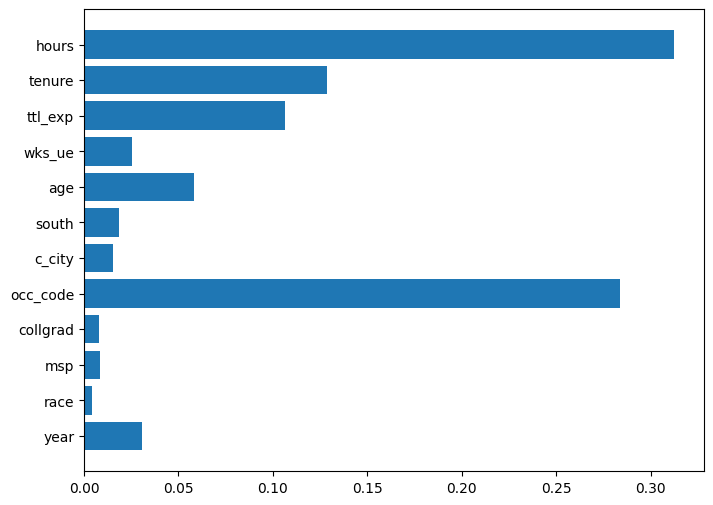

In [58]:
# TODO: visualize the feature importance
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(est2.cate_feature_names(), est2.feature_importances_)
plt.show()